# **Aprendizaje no supervisado**
# UL12. Reforzamiento 2

## 1. Clustering

Realicemos clustering para la data de pinguinos. ¿Podemos generar un clustering para segmentar la especie?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import silhouette_score

from IPython.display import display
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.preprocessing import scale

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import normalize

from sklearn.decomposition import PCA

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
penguins_df = pd.read_csv("/content/drive/MyDrive/Becas_Capital_Humano/Material/M05-Apredizaje_No_supervisado/penguins.csv")

In [ ]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [ ]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


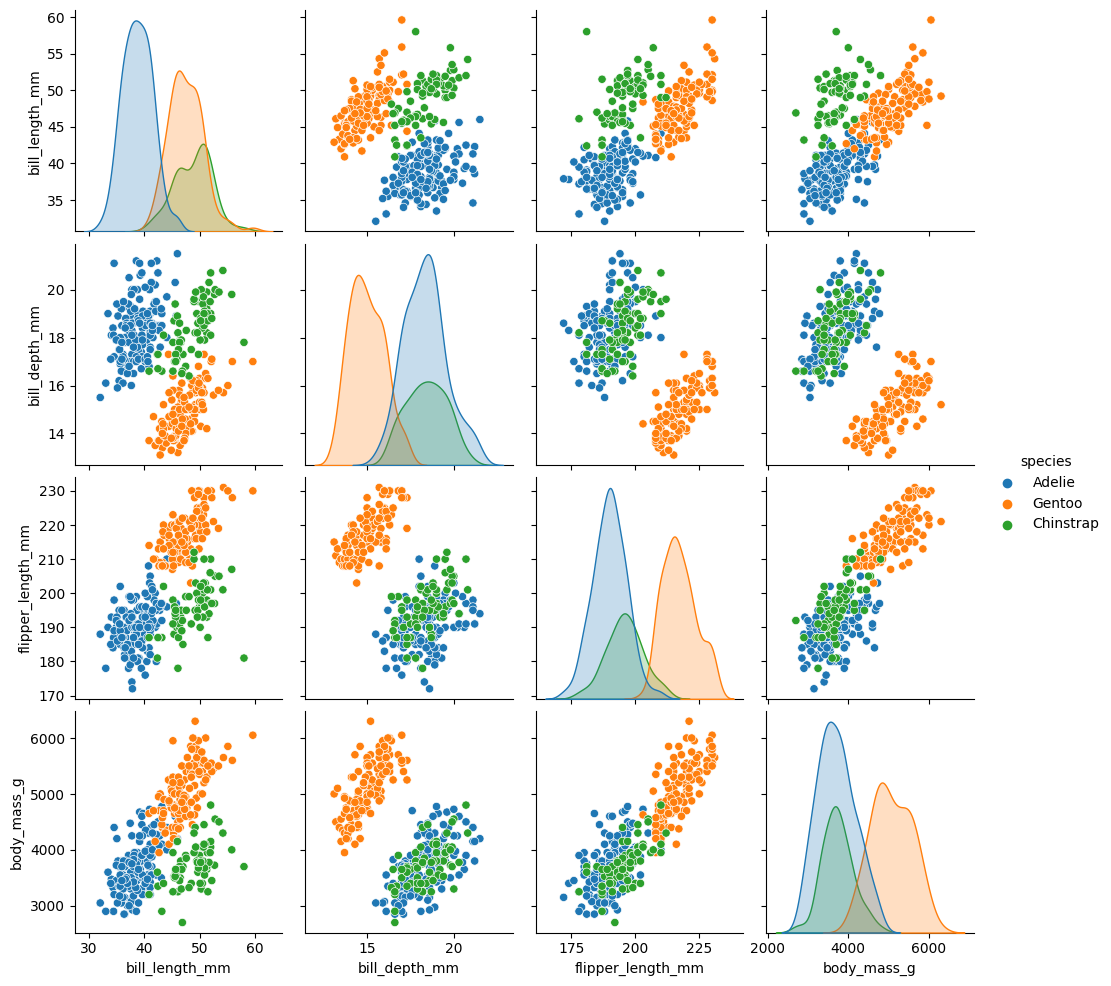

In [ ]:
sns.pairplot(data=penguins_df, hue='species')
plt.show()

Desafio, generar un modelo de clustering para las clases de pinguinos. Primero utilizaremos solo las variables cuantitativas que tenemos a mano.

In [ ]:
#Filtremos del dataset registros que tengan valores nulos
penguins_df_numerics = penguins_df[['bill_depth_mm','bill_length_mm','flipper_length_mm','body_mass_g','species']].copy(deep=True)

print(penguins_df_numerics.isna().sum() )

#Eliminaremos esos registros con valores nulos (2 registros)
penguins_df_numerics.dropna(how = "any", inplace=True)

penguins_df_numerics.isna().sum()

bill_depth_mm        2
bill_length_mm       2
flipper_length_mm    2
body_mass_g          2
species              0
dtype: int64


bill_depth_mm        0
bill_length_mm       0
flipper_length_mm    0
body_mass_g          0
species              0
dtype: int64

In [ ]:
#Separamos el dataset en X_data, y_data
X_data = penguins_df_numerics[['bill_depth_mm','bill_length_mm','flipper_length_mm','body_mass_g']]
penguins_df_numerics['species_num'] = penguins_df_numerics['species'].map({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})
y_data = penguins_df_numerics['species_num']
X_data.reset_index(drop=True, inplace=True)
y_data.reset_index(drop=True, inplace=True)

In [ ]:
scaler = StandardScaler()
X_data = pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns)

In [ ]:
#Aplicamos Clustering Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_data)
clusters = kmeans.predict(X_data)

centers_penguins = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


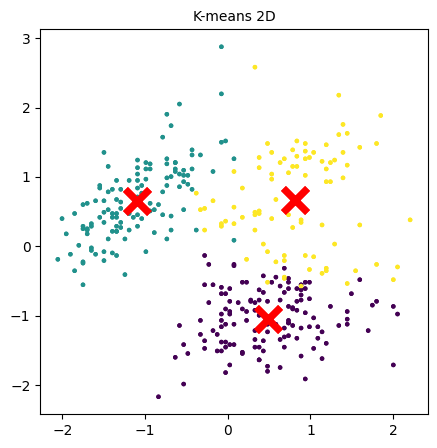

In [ ]:
def plot_clusters_2D(X, clusters=None, centers=None):
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=5, cmap="viridis")

    if np.any(centers):
        plt.scatter(
            centers[:, 0], centers[:, 1], marker="x", s=300, linewidths=5, color="r"
        )


X_plot = np.array(X_data)

plt.figure(figsize=[5, 5])
plot_clusters_2D(X_plot, clusters=clusters, centers=centers_penguins)
plt.title("K-means 2D", fontsize=10)

plot_clusters_2D(X_plot, clusters=clusters, centers=centers_penguins)

Número de clusters: 10
Homogeneity: 0.4909457331008533
Completeness: 0.31532816225426474
Mean Silhouette score: -0.13181862171800837


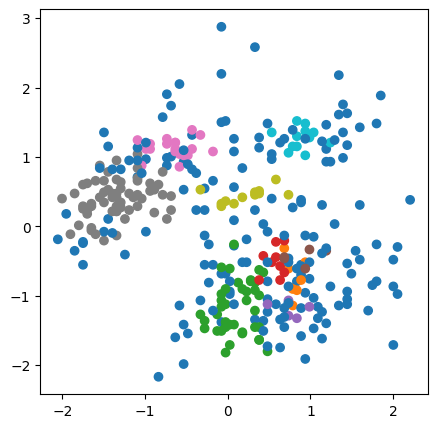

In [ ]:
# DBSCAN
# Normalización de las variables

X = StandardScaler().fit_transform(X_data)

# Entrenar DBSCAN
y_pred = DBSCAN(eps=0.4, min_samples=5).fit_predict(X)

# Graficar las predicciones
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='tab10')

# Imprimir los resultados
print('Número de clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Homogeneity: {}'.format(metrics.homogeneity_score(y_data, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y_data, y_pred)))
print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

In [ ]:
#Aplicamos PCA en los datasets
X_for_pca = scaler.fit_transform(X_data)
# 4 dimensiones
pca = PCA(n_components=4)
pca.fit_transform(X_for_pca)

print(pca.explained_variance_ratio_)

[0.68843878 0.19312919 0.09130898 0.02712305]


Text(0.5, 1.0, 'Penguins Dataset - Explained Variance')

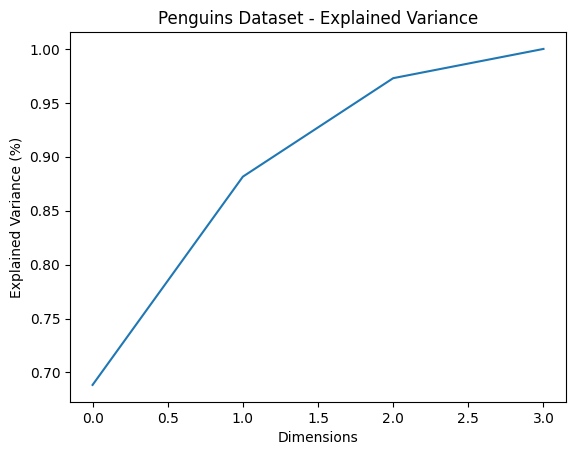

In [ ]:
plt.figure()
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance (%)")
plt.title("Penguins Dataset - Explained Variance")

In [ ]:
# Reducción de 2 dimensiones
pca = PCA(n_components=2)
X_reduced = pd.DataFrame(
    pca.fit_transform(X_for_pca),
    columns=["Componente Principal 1", "Componente Principal 2"],
)

In [ ]:
X_reduced.head()

,Componente Principal 1,Componente Principal 2
0,-1.843445,0.047702
1,-1.306762,-0.428348
2,-1.369181,-0.154476
3,-1.878827,-0.002048
4,-1.911748,0.829210


In [ ]:
kmeans = KMeans(n_clusters=3)

#KMEANS SIN PCA
kmeans.fit(X_data)
clusters_sin_pca=pd.DataFrame(kmeans.predict(X_data), columns=['Class_kmeans_sin_pca'])

#KMEANS SIN PCA y SOLO DOS VARIABLES
kmeans.fit(X_data[['bill_depth_mm','bill_length_mm']])
clusters_sin_pca_2_var=pd.DataFrame(kmeans.labels_, columns=['Class_kmeans_sin_pca_2_var'])

#KMEANS CON PCA y TODAS LAS VARIABLES
kmeans.fit(X_reduced)
clusters_con_pca=pd.DataFrame(kmeans.labels_, columns=['Class_kmeans_con_pca'])

finalDf = pd.concat([X_reduced, y_data], axis = 1)
finalDf = pd.concat([finalDf,clusters_con_pca], axis = 1)
finalDf = pd.concat([finalDf,clusters_sin_pca], axis = 1)
finalDf = pd.concat([finalDf,clusters_sin_pca_2_var], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print('Metricas Kmeans con PCA y todas las caracteristicas')
# Calcular la homogeneity y el completeness.
homogeneity = metrics.homogeneity_score(finalDf['species_num'], finalDf['Class_kmeans_con_pca'])
completeness = metrics.completeness_score(finalDf['species_num'], finalDf['Class_kmeans_con_pca'])
print('homogeneity',float(homogeneity))
print('completeness',float(completeness))

print('-------------------------------------------')
print('Metricas Kmeans sin PCA y todas las caracteristicas')
homogeneity = metrics.homogeneity_score(finalDf['species_num'], finalDf['Class_kmeans_sin_pca'])
completeness = metrics.completeness_score(finalDf['species_num'], finalDf['Class_kmeans_sin_pca'])
print('homogeneity',homogeneity)
print('completeness',completeness)

print('-------------------------------------------')
print('Metricas Kmeans sin PCA y 2 caracteristicas')
homogeneity = metrics.homogeneity_score(finalDf['species_num'], finalDf['Class_kmeans_sin_pca_2_var'])
completeness = metrics.completeness_score(finalDf['species_num'], finalDf['Class_kmeans_sin_pca_2_var'])
print('homogeneity',homogeneity)
print('completeness',completeness)

Metricas Kmeans con PCA y todas las caracteristicas
homogeneity 0.7485690076463062
completeness 0.7211883244570384
-------------------------------------------
Metricas Kmeans sin PCA y todas las caracteristicas
homogeneity 0.798050614455528
completeness 0.7733431481473927
-------------------------------------------
Metricas Kmeans sin PCA y 2 caracteristicas
homogeneity 0.7358972213568321
completeness 0.7419520950949806


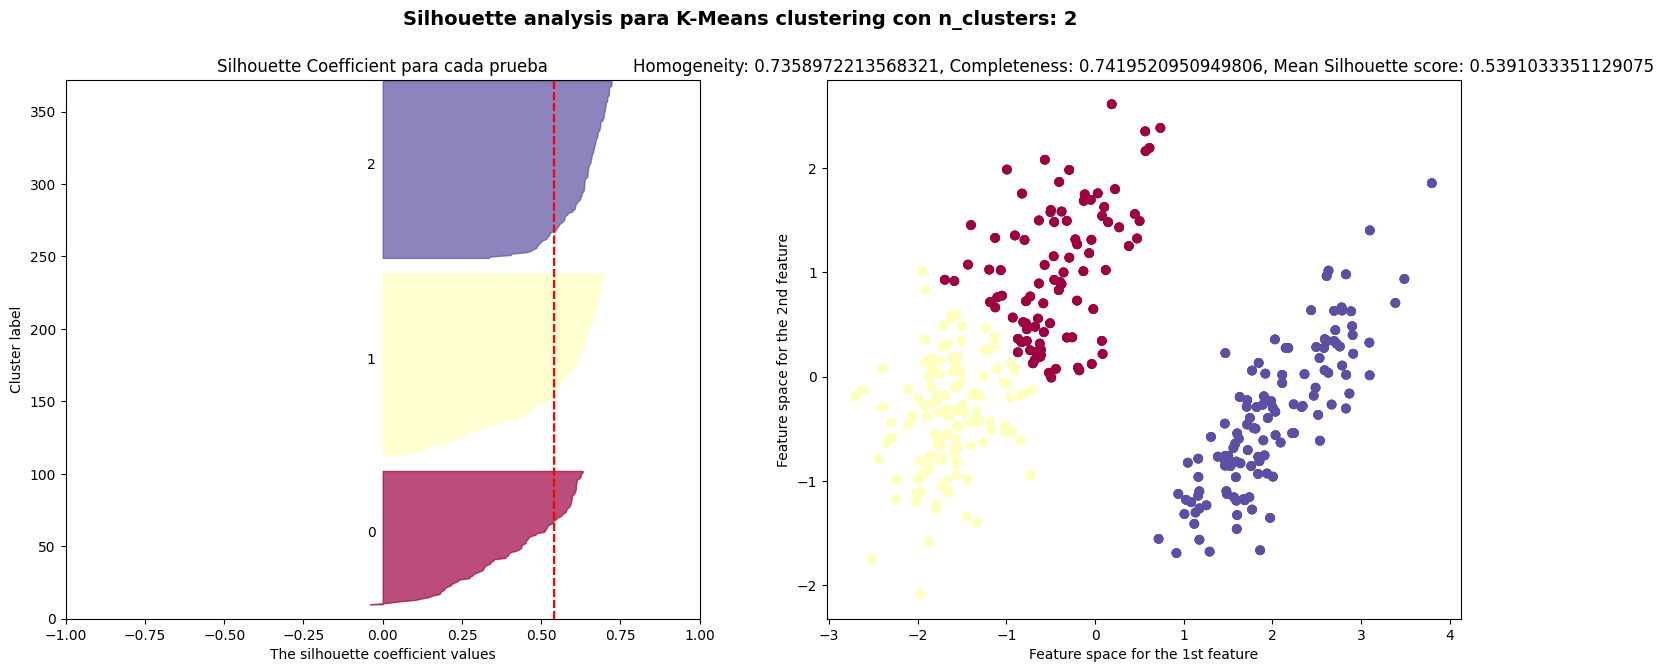

In [ ]:
#Graficamos el coeficiente de Silhouette para el caso de Kmeans con PCA y todas las caracteristicas
# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X_reduced, finalDf['Class_kmeans_con_pca'])
s = metrics.silhouette_samples(X_reduced, finalDf['Class_kmeans_con_pca'])

# Gráficos -----------------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Configure plot.
plt.suptitle('Silhouette analysis para K-Means clustering con n_clusters: {}'.format(2),
              fontsize=14, fontweight='bold')

# Configure 1st subplot.
ax1.set_title('Silhouette Coefficient para cada prueba')
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.set_xlim([-1, 1])
ax1.set_ylim([0, len(X_reduced) + (3) * 10])

# Configure 2st subplot.
ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity,
                                                                                        completeness,
                                                                                        s_mean))
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

# For 1st subplot ------------------------------------------------------------------------------------------
import matplotlib.cm as cm
    # Plot Silhouette Coefficient for each sample
y_lower = 10
for i in range(3):
  ith_s = s[finalDf['Class_kmeans_con_pca'] == i]
  ith_s.sort()
  size_cluster_i = ith_s.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.Spectral(float(i) / 2)
  ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                     facecolor=color, edgecolor=color, alpha=0.7)
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

  # Plot the mean Silhouette Coefficient using red vertical dash line.
  ax1.axvline(x=s_mean, color="red", linestyle="--")

  # For 2st subplot -------------------------------------------------------------------------------------------

  # Plot the predictions
  colors = cm.Spectral(finalDf['Class_kmeans_con_pca'].astype(float) / 2)
  ax2.scatter(X_reduced['Componente Principal 1'], X_reduced['Componente Principal 2'], c=colors)

In [ ]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [ ]:
#Limpiar Nulos
print(penguins_df.isna().sum() )
print(penguins_df.shape)

#Eliminaremos esos registros con valores nulos (2 registros)
penguins_df_clean = penguins_df.dropna(how = "any", inplace=False)
print('\n####\nResultado limpieza\n')
print(penguins_df_clean.isna().sum() )
print(penguins_df_clean.shape)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
(344, 7)

####
Resultado limpieza

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
(333, 7)


In [ ]:
#Agregar variables no numericas al dataset y clusterizar
penguins_df_dummies = pd.get_dummies(penguins_df_clean, columns = ['island','sex'])
penguins_df_dummies['species_num'] = penguins_df_dummies['species'].map({'Adelie':0, 'Gentoo':1, 'Chinstrap':2})
penguins_df_dummies.head().T

,0,1,2,4,5
species,Adelie,Adelie,Adelie,Adelie,Adelie
bill_length_mm,39.1,39.5,40.3,36.7,39.3
bill_depth_mm,18.7,17.4,18.0,19.3,20.6
flipper_length_mm,181.0,186.0,195.0,193.0,190.0
body_mass_g,3750.0,3800.0,3250.0,3450.0,3650.0
island_Biscoe,0,0,0,0,0
island_Dream,0,0,0,0,0
island_Torgersen,1,1,1,1,1
sex_female,0,1,1,1,0
sex_male,1,0,0,0,1


In [ ]:
penguins_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   island_Biscoe      333 non-null    uint8  
 6   island_Dream       333 non-null    uint8  
 7   island_Torgersen   333 non-null    uint8  
 8   sex_female         333 non-null    uint8  
 9   sex_male           333 non-null    uint8  
 10  species_num        333 non-null    int64  
dtypes: float64(4), int64(1), object(1), uint8(5)
memory usage: 19.8+ KB


In [ ]:
columnas = list(penguins_df_dummies.columns)
columnas.remove('species')
columnas.remove('species_num')
print(columnas)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Biscoe', 'island_Dream', 'island_Torgersen', 'sex_female', 'sex_male']


In [ ]:
#Separamos el dataset en X_data, y_data
X_data = penguins_df_dummies[columnas]
y_data = penguins_df_dummies['species_num']
scaler = StandardScaler()
X_data = pd.DataFrame(scaler.fit_transform(X_data), columns=X_data.columns)
X_data.reset_index(drop=True, inplace=True)
y_data.reset_index(drop=True, inplace=True)

In [ ]:
print(X_data.shape)
print(y_data.shape)

(333, 9)
(333,)


[4.23366869e-01 2.71885755e-01 1.59915147e-01 7.91226083e-02
 3.33860272e-02 2.12813639e-02 1.10422299e-02 5.72689056e-33
 3.21086852e-33]


Text(0.5, 1.0, 'Penguins Dataset - Explained Variance')

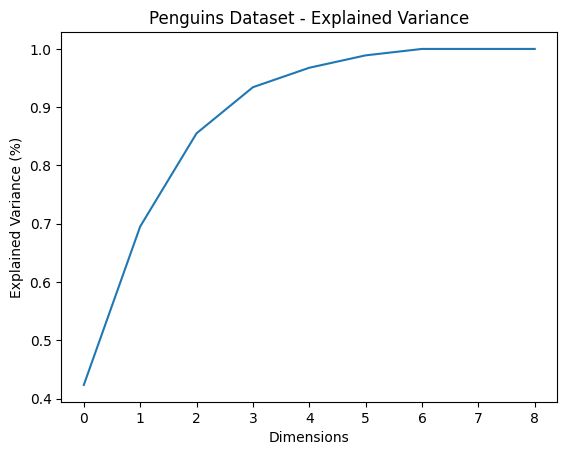

In [ ]:
#Aplicamos PCA en los datasets
X_for_pca = scaler.fit_transform(X_data)
# 4 dimensiones
pca = PCA(n_components=len(X_data.columns))
pca.fit_transform(X_for_pca)

print(pca.explained_variance_ratio_)

plt.figure()
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance (%)")
plt.title("Penguins Dataset - Explained Variance")

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.42336687, 0.69525262, 0.85516777, 0.93429038, 0.96767641,
       0.98895777, 1.        , 1.        , 1.        ])

In [ ]:
# Reducción de 3 dimensiones
pca = PCA(n_components=3)
X_reduced = pd.DataFrame(
    pca.fit_transform(X_for_pca),
    columns=["Componente Principal 1", "Componente Principal 2", "Componente Principal 3"],
)

In [ ]:
kmeans = KMeans(n_clusters=3)

#KMEANS SIN PCA
kmeans.fit(X_data)
clusters_sin_pca=pd.DataFrame(kmeans.predict(X_data), columns=['Class_kmeans_sin_pca'])

#KMEANS SIN PCA y SOLO DOS VARIABLES
kmeans.fit(X_data[['bill_depth_mm','bill_length_mm']])
clusters_sin_pca_2_var=pd.DataFrame(kmeans.labels_, columns=['Class_kmeans_sin_pca_2_var'])

#KMEANS CON PCA y TODAS LAS VARIABLES
kmeans.fit(X_reduced)
clusters_con_pca=pd.DataFrame(kmeans.labels_, columns=['Class_kmeans_con_pca'])

finalDf = pd.concat([X_reduced, y_data], axis = 1)
finalDf = pd.concat([finalDf,clusters_con_pca], axis = 1)
finalDf = pd.concat([finalDf,clusters_sin_pca], axis = 1)
finalDf = pd.concat([finalDf,clusters_sin_pca_2_var], axis = 1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print('Metricas Kmeans con PCA y todas las caracteristicas')
# Calcular la homogeneity, completeness y silhouette.
homogeneity = metrics.homogeneity_score(finalDf['species_num'], finalDf['Class_kmeans_con_pca'])
completeness = metrics.completeness_score(finalDf['species_num'], finalDf['Class_kmeans_con_pca'])
print('homogeneity',float(homogeneity))
print('completeness',float(completeness))


print('-------------------------------------------')
print('Metricas Kmeans sin PCA y todas las caracteristicas')
homogeneity = metrics.homogeneity_score(finalDf['species_num'], finalDf['Class_kmeans_sin_pca'])
completeness = metrics.completeness_score(finalDf['species_num'], finalDf['Class_kmeans_sin_pca'])
print('homogeneity',homogeneity)
print('completeness',completeness)

print('-------------------------------------------')
print('Metricas Kmeans sin PCA y 2 caracteristicas')
homogeneity = metrics.homogeneity_score(finalDf['species_num'], finalDf['Class_kmeans_sin_pca_2_var'])
completeness = metrics.completeness_score(finalDf['species_num'], finalDf['Class_kmeans_sin_pca_2_var'])
print('homogeneity',homogeneity)
print('completeness',completeness)

Metricas Kmeans con PCA y todas las caracteristicas
homogeneity 0.6186947467131835
completeness 0.5940632681008812
-------------------------------------------
Metricas Kmeans sin PCA y todas las caracteristicas
homogeneity 0.6186947467131835
completeness 0.5940632681008812
-------------------------------------------
Metricas Kmeans sin PCA y 2 caracteristicas
homogeneity 0.7311649241047942
completeness 0.7370421498730956


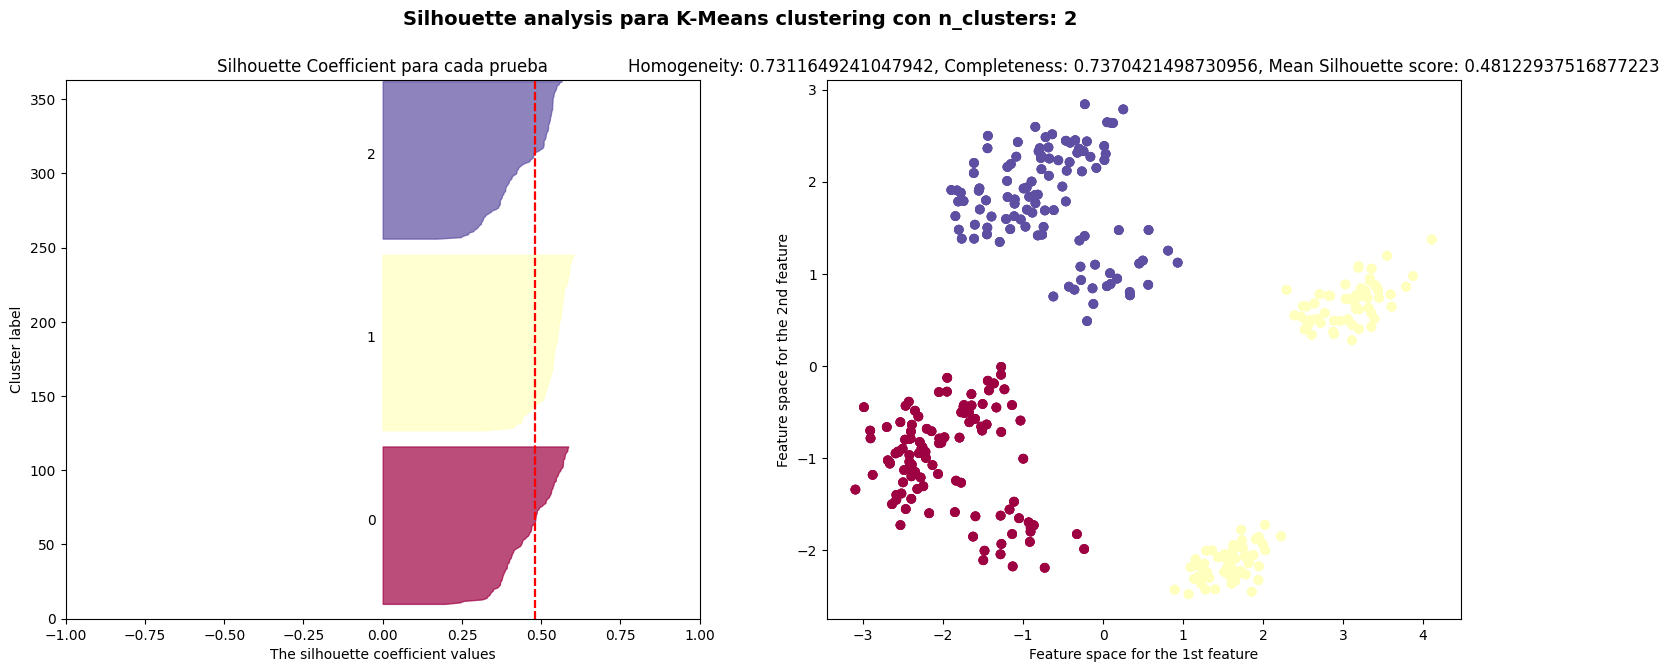

In [ ]:
#Graficamos el coeficiente de Silhouette para el caso de Kmeans con PCA y todas las caracteristicas
# Calcular el Silhouette Coefficient promedio para todos los puntos.
s_mean = metrics.silhouette_score(X_reduced, finalDf['Class_kmeans_con_pca'])
s = metrics.silhouette_samples(X_reduced, finalDf['Class_kmeans_con_pca'])

# Gráficos -----------------------------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Configure plot.
plt.suptitle('Silhouette analysis para K-Means clustering con n_clusters: {}'.format(2),
              fontsize=14, fontweight='bold')

# Configure 1st subplot.
ax1.set_title('Silhouette Coefficient para cada prueba')
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.set_xlim([-1, 1])
ax1.set_ylim([0, len(X_reduced) + (3) * 10])

# Configure 2st subplot.
ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity,
                                                                                        completeness,
                                                                                        s_mean))
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

# For 1st subplot ------------------------------------------------------------------------------------------
import matplotlib.cm as cm
    # Plot Silhouette Coefficient for each sample
y_lower = 10
for i in range(3):
  ith_s = s[finalDf['Class_kmeans_con_pca'] == i]
  ith_s.sort()
  size_cluster_i = ith_s.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.Spectral(float(i) / 2)
  ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                     facecolor=color, edgecolor=color, alpha=0.7)
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

  # Plot the mean Silhouette Coefficient using red vertical dash line.
  ax1.axvline(x=s_mean, color="red", linestyle="--")

  # For 2st subplot -------------------------------------------------------------------------------------------

  # Plot the predictions
  colors = cm.Spectral(finalDf['Class_kmeans_con_pca'].astype(float) / 2)
  ax2.scatter(X_reduced['Componente Principal 1'], X_reduced['Componente Principal 2'], c=colors)

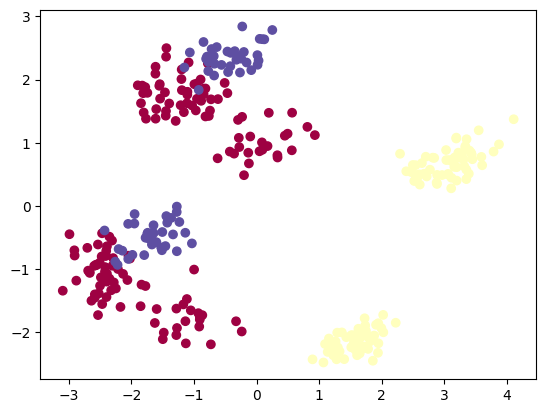

In [ ]:
colors = cm.Spectral(finalDf['species_num'].astype(float)/2)
plt.scatter(X_reduced['Componente Principal 1'], X_reduced['Componente Principal 2'], c=colors)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=4)
X_train.reset_index(inplace = True, drop=True)
X_test.reset_index(inplace = True, drop=True)
y_train.reset_index(inplace = True, drop=True)
y_test.reset_index(inplace = True, drop=True)
#Escalamos la data, por separado para no generar Data Leaking!
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_data.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns=X_data.columns)
print(X_train.shape)
print(X_test.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-means 2D')

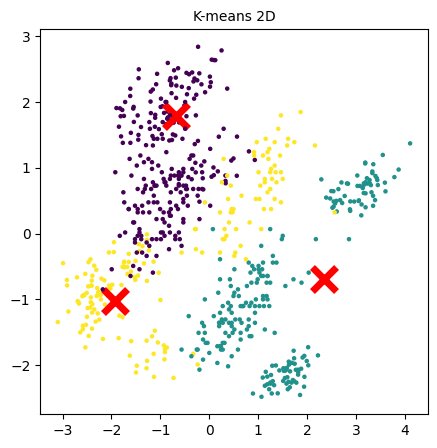

In [ ]:
#Aplicamos Clustering Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)
clusters = kmeans.predict(X_reduced)
centers_penguins = kmeans.cluster_centers_

X_plot = np.array(X_reduced)

plt.figure(figsize=[5, 5])
plot_clusters_2D(X_plot, clusters=clusters, centers=centers_penguins)
plt.title("K-means 2D", fontsize=10)


Text(0.5, 1.0, 'K-means 2D')

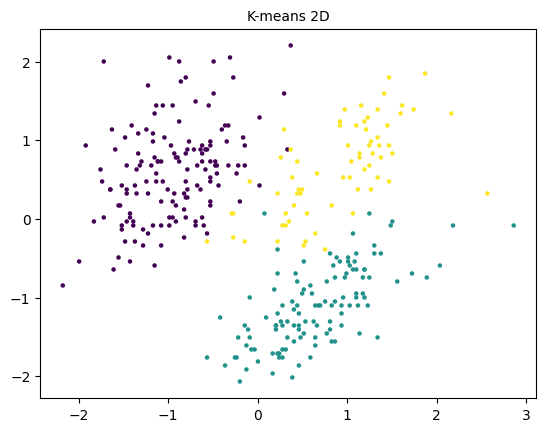

In [ ]:
X_plot = np.array(X_data)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_data, s=5, cmap="viridis")
plt.title("K-means 2D", fontsize=10)